<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Emiliano Mena González y .

**Fecha:** 14 de marzo del 2023.

**Expediente** : 728407 y .
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/EmilianoMena/ProyectoConjunto_EMena_JJDegollado

# Tarea 5: Clase 10

# <font color ='red'> **Tarea 5**  
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:

In [3]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

### Ejercicio 1:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

Código de solución estudiante 1

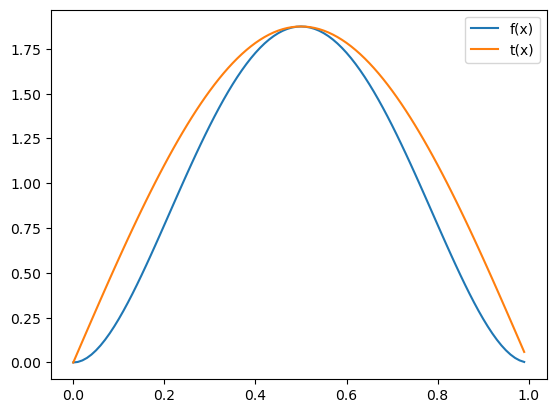

In [4]:
# Función objetivo f(x)
f = lambda x: 30 *(x**2 - 2*x**3 + x**4)
# a (Máximo de la función objetivo)
a = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
# Función t(x)
t = lambda x: a * np.sin(np.pi * x)
# Gráficar ambas funciones
x = np.arange(0, 1, 0.01)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend();

Código de solución estudiante 2

### Ejercicio 2:
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

Código de solución estudiante 1

Código de solución estudiante 2

### Ejercicio 3:
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

Código de solución estudiante 1

Código de solución estudiante 2

### Ejercicio 4:
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada.

Código de solución estudiante 1

Código de solución estudiante 2

### Ejercicio 5:
5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados.

Código de solución estudiante 1

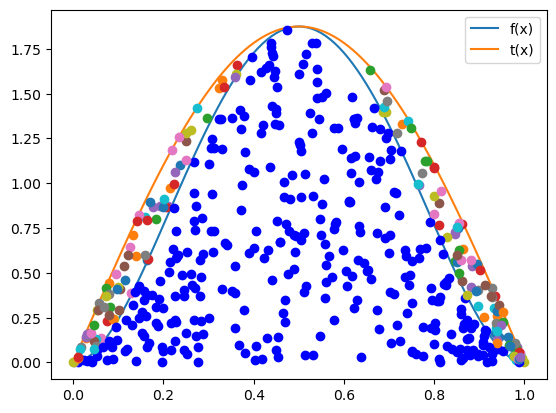

In [5]:
# Función de aceptación y rechazo
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <= f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]   
    plt.show()
# Solución
# Función objetivo f(x)
f = lambda x: 30 *(x**2 - 2*x**3 + x**4)
# a (Máximo de la función objetivo)
a = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
# Función t(x)
t = lambda x: a * np.sin(np.pi * x)
# Gráficar ambas funciones
x = np.arange(0, 1, 0.01)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend();
# Simulaciones
N = 500
R1 = np.random.rand(N)
R2 = np.random.rand(N)
# Prueba de función creada
Acep_rechazo(R2, R1, f, t)

Código de solución estudiante 2

### Ejercicio 6:
6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

Código de solución estudiante 1

In [6]:
# Función de aceptación rechazo
def prob_acep(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    return sum(condition)
# Solución
# Función objetivo 
f = lambda x: 30 *(x**2 - 2*x**3 + x**4)
# Función t(x) senoidal
t1 = lambda x: a * np.sin(np.pi * x)
# Función t(x) constante
t2 = lambda x: a * np.ones(len(x))
# Simulaciones
N = 10000
R1 = np.random.rand(N)
R2 = np.random.rand(N)
# Probabilidad senoidal
p1 = prob_acep(R2, R1, f, t1)/N
# Probabilidad constante
p2 = prob_acep(R2, R1, f, t2)/N
print(f'La probabilidad de aceptación de puntos con t(x) senoidal es de {p1} y con t(x) constante es de {p2}')

La probabilidad de aceptación de puntos con t(x) senoidal es de 0.6977 y con t(x) constante es de 0.5307


Código de solución estudiante 2

### Ejercicio 7:
7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

Código de solución estudiante 1

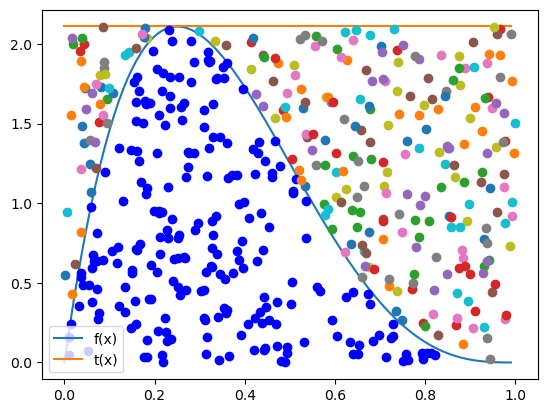

In [7]:
# Función objetivo 
f = lambda x: 20*x * (1-x)**3
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
# Función t -> Función constante
t = lambda x: max_f * np.ones(len(x))
# Rango donde se graficará las funciones
x = np.arange(0, 1, 0.01)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
# Simulaciones
N = 500
R1 = np.random.rand(N)
R2 = np.random.rand(N)
# Prueba de función creada
Acep_rechazo(R2, R1, f, t)

Código de solución estudiante 2